# Principal Component Analysis with Cancer Data

In [770]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [771]:
df = pd.read_csv("C:\\Users\\srivi\\Downloads\\Cancer.csv")

In [772]:
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [773]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [774]:
df.columns.values

array(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape',
       'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei',
       'Normal Nucleoli', 'Bland Chromatin', 'Mitoses', 'Class'],
      dtype=object)

In [775]:
df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

# Insight:
All features are integers except bare nuclei which is object

In [776]:
df.shape

(699, 11)

# Insight:
There are 699 records and 11 features including target variable(class) 

In [777]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   ClumpThickness               699 non-null    int64 
 2   Cell Size                    699 non-null    int64 
 3   Cell Shape                   699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Normal Nucleoli              699 non-null    int64 
 8   Bland Chromatin              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [778]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


# Insight:

No missing values

ClumpThickness, Cell Size, Cell Shape, Marginal Adhesion, Normal Nucleoli, Bland Chromatin are bit skewed. 

All the independent feature values lies between 1 and 10

For Mitoses min and all quantiles are 1 but max value is 10. Can be considered as outlier. some other features also has outliers but later can be see from box plot.


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [779]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
df.isnull().sum().any()

False

# Insight:
There are no missing values

In [780]:
# No missing values found. So let us try to remove ? from bare nuclei column
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Get count of rows having ?
print("Before imputing incorrect values")
print(df['Bare Nuclei'].value_counts())

#df[['Bare Nuclei']] = df['Bare Nuclei'].replace(to_replace='?',value=1, inplace=True)
df[['Bare Nuclei']] = np.where(df['Bare Nuclei']=='?' ,'1',df['Bare Nuclei'])

print("After imputing incorrect values")
print(df['Bare Nuclei'].value_counts())

Before imputing incorrect values
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64
After imputing incorrect values
1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64


# Insight:
There are no incorrect data now. 

Since bare nuclei was the only object data type in the data set so we checked for any incorrect data in the feature. 

16 question marks are now imputed with mode value 1 directly because the column is yet to be converted to numeric so cant use numpy lib at this point


In [781]:
print(df['Bare Nuclei'].dtypes)
df['Bare Nuclei'] = df['Bare Nuclei'].astype('int64')
print(df['Bare Nuclei'].dtypes)

object
int64


# Insight:
Converted bare neuclei feature from object to int can be seen from below cell

In [782]:
df.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [783]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.486409e+00,3.621929,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


In [784]:
df[df.duplicated()==True].count()

ID                             9
ClumpThickness                 9
Cell Size                      9
Cell Shape                     9
Marginal Adhesion              9
Single Epithelial Cell Size    9
Bare Nuclei                    9
Normal Nucleoli                9
Bland Chromatin                9
Mitoses                        9
Class                          9
dtype: int64

In [785]:
df.drop_duplicates(keep='first',inplace=True)

In [786]:
df.shape

(690, 11)

# Insight:
There are 9 duplicate values and hence the duplicates are removed keeping its first occurence

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [787]:
#Dropping id as it dosent make any sense
df = df.drop(labels=['ID'], axis=1)

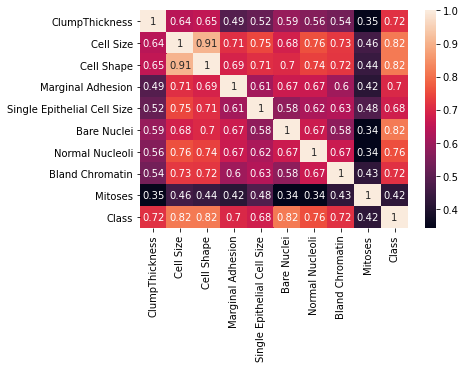

In [788]:
# Check for correlation of variables
import seaborn as sns

sns.heatmap(df.corr(),annot=True)

# Insight:
From correlation matrix we see that all the independent variables shows good correlation with each other except mitoses

In [789]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [790]:
#Let us check the pair plot

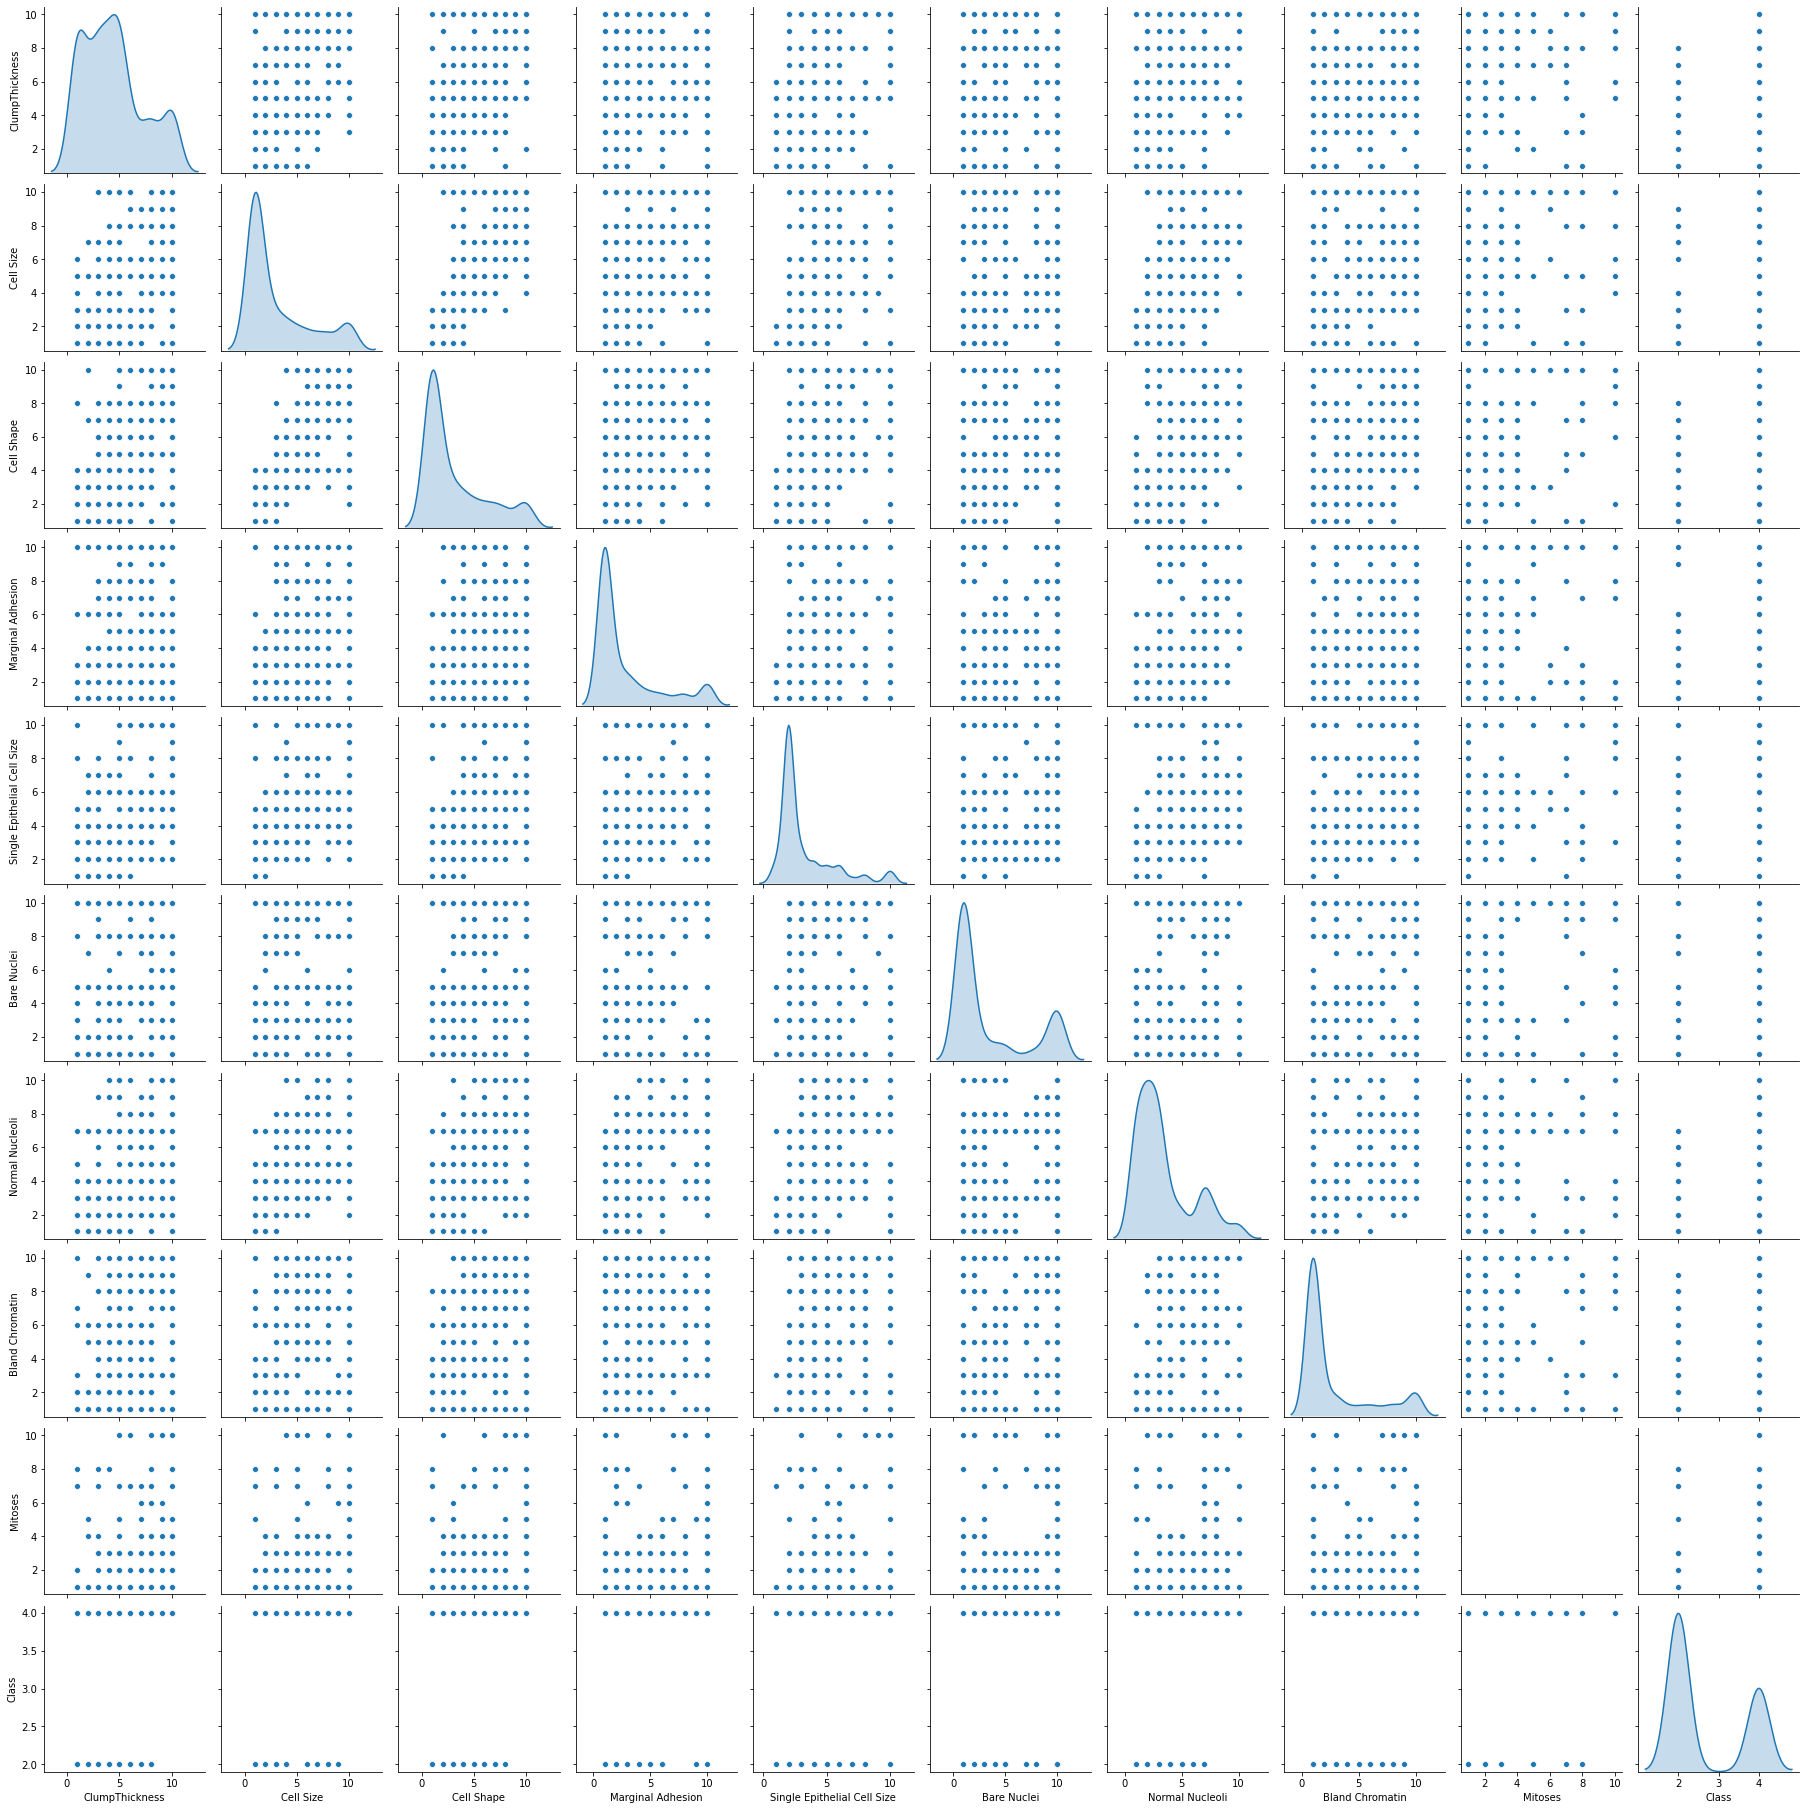

In [791]:
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(data=df,diag_kind='kde')

In [792]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

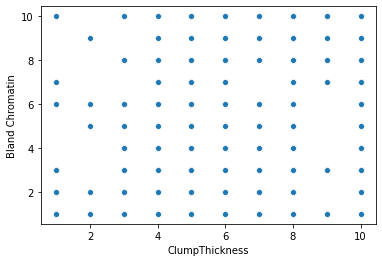

In [793]:
sns.scatterplot(x="ClumpThickness",
                    y="Bland Chromatin",
                    data=df)

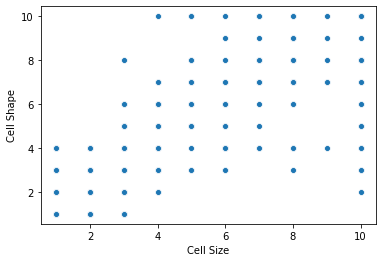

In [794]:
sns.scatterplot(x="Cell Size",
                    y="Cell Shape",
                    data=df)                      


# Insight:
from the above plots we can see that most of the features dosent shows much of linear correlation but the correlation is still good.

cell size and cell shape shows some linear correlation


# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

variables are not standardised as all the values are within 1 to 10. if not need to standardise the variables.

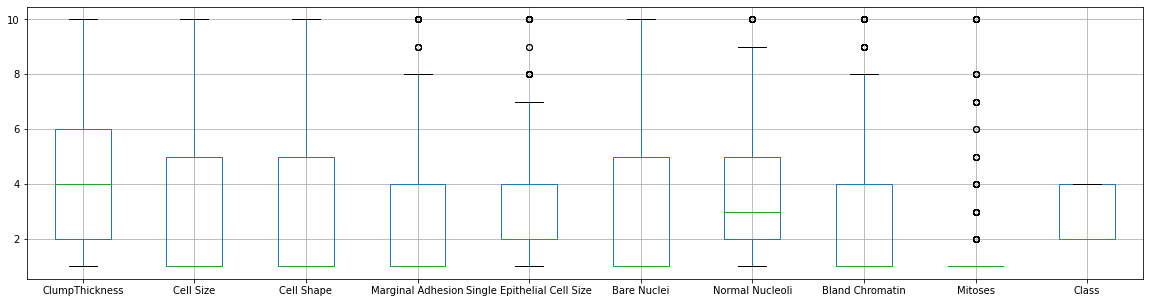

In [795]:
df.boxplot(return_type='axes',figsize=(20,5),whis=1.5)


In [796]:
y=df['Class']
df = df.drop(labels=['Mitoses','Class'], axis=1)

In [797]:
# We could see most of the outliers are now removed.

(690, 8)


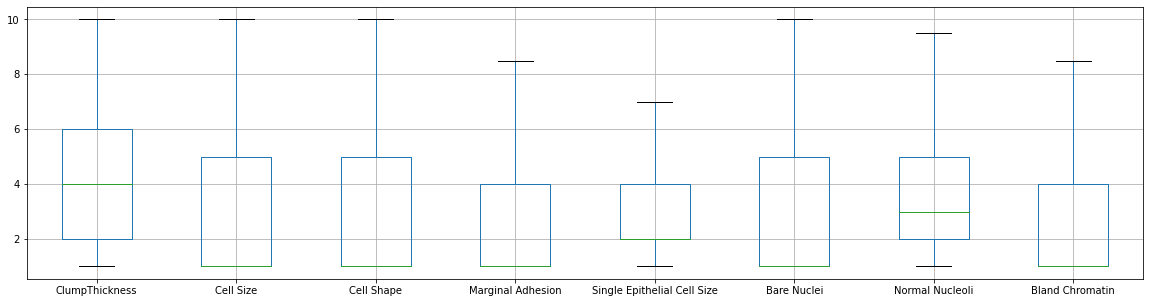

In [798]:
def out(col):
    q25, q75 = np.percentile(col, 25), np.percentile(col, 75)
    iqr = q75 - q25
    
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    upper = q75 + cut_off
    return upper

for x in df.columns:
    up = out1(df[x])
    #print(up)
    df[x]=np.where(df[x]>up ,up,df[x])
    
df.boxplot(figsize=(20,5))
print(df.shape)

# Insight:
Removed the upper outliers because its so explicit(refer previous boxplot). Above box plot we can clearly seen that outliers are removed.

removed mitoses from the feature as most of the value is 1 and other values of outlier. keeping it will add no information to data

# Q6 Create a covariance matrix for identifying Principal components

In [799]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(df.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 7.93762016  5.51311079  5.45212343  3.63354578  2.7211081   6.01908248
   3.82462296  4.22579668]
 [ 5.51311079  9.25650701  8.15558781  5.69404935  4.20261248  7.53352685
   5.56342525  6.10928882]
 [ 5.45212343  8.15558781  8.76659936  5.35585915  3.93215751  7.54129488
   5.26492712  5.91868808]
 [ 3.63354578  5.69404935  5.35585915  6.62799268  3.0214173   6.37728908
   4.23843945  4.42231653]
 [ 2.7211081   4.20261248  3.93215751  3.0214173   3.1312362   4.00301003
   2.80563514  3.34911024]
 [ 6.01908248  7.53352685  7.54129488  6.37728908  4.00301003 13.08315139
   5.89196062  5.91820849]
 [ 3.82462296  5.56342525  5.26492712  4.23843945  2.80563514  5.89196062
   5.78994762  4.47210513]
 [ 4.22579668  6.10928882  5.91868808  4.42231653  3.34911024  5.91820849
   4.47210513  7.56324068]]


# Insight:
The covariance matrix will be output of 8x8 because there are 8 features

# Q7 Identify eigen values and eigen vector

In [800]:
# Step 2- Get eigen values and eigen vector

In [801]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.31343948 -0.03787068 -0.90630543  0.03930038  0.27689589  0.01934171
   0.01838939 -0.00196016]
 [-0.418595   -0.31336829  0.06765714 -0.35640245 -0.26110935  0.05435264
   0.11425243 -0.71469744]
 [-0.40644096 -0.25107891  0.01286885 -0.30180514 -0.38657119  0.12752253
  -0.41656721  0.58419659]
 [-0.31455328  0.0690924   0.33728401 -0.26245801  0.78322492  0.28772564
  -0.12800408  0.03202185]
 [-0.21468775 -0.12589801  0.08748555 -0.02082631 -0.03572772  0.1240141
   0.88388911  0.36339439]
 [-0.46221108  0.83112975  0.05605484  0.14558887 -0.25212489  0.06039126
   0.01104257 -0.06252988]
 [-0.30189218 -0.05535716  0.13733063  0.00631945  0.16387702 -0.9237124
   0.00782876  0.0820701 ]
 [-0.33395673 -0.35051442  0.17450301  0.83053744  0.0239354   0.15922455
  -0.12349797 -0.06474334]]

 Eigen Values 
%s [44.94254041  4.72572741  4.06827428  2.58078486  2.20210522  1.80267166
  1.04726035  0.78693092]


# Insight:
eigen vectors gives directions in feature space where information is available. 

It will give direction of 8 new dimension.

eigen value gives how much information(variance) in that direction.

PC1 will mostly have most of the informtion.

# Q8 Find variance and cumulative variance by each eigen vector

In [802]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

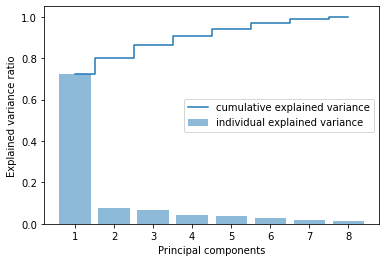

In [803]:
plt.bar(range(1,9), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,9),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Insight:
from the above plot we can infer that from pc1 to pc6 more than 95% of information are captured cumulatively.

so we can decide to drop last two principal components for further models.

pca is black box model hence interpretability is difficult.

the features are not scaled because all the values were within 1 to 10


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [804]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(df)

In [805]:
pca.components_

array([[ 0.31343948,  0.418595  ,  0.40644096,  0.31455328,  0.21468775,
         0.46221108,  0.30189218,  0.33395673],
       [ 0.03787068,  0.31336829,  0.25107891, -0.0690924 ,  0.12589801,
        -0.83112975,  0.05535716,  0.35051442],
       [-0.90630543,  0.06765714,  0.01286885,  0.33728401,  0.08748555,
         0.05605484,  0.13733063,  0.17450301],
       [-0.03930038,  0.35640245,  0.30180514,  0.26245801,  0.02082631,
        -0.14558887, -0.00631945, -0.83053744],
       [-0.27689589,  0.26110935,  0.38657119, -0.78322492,  0.03572772,
         0.25212489, -0.16387702, -0.0239354 ],
       [ 0.01934171,  0.05435264,  0.12752253,  0.28772564,  0.1240141 ,
         0.06039126, -0.9237124 ,  0.15922455]])

In [806]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6'])

In [807]:
finalDf = pd.concat([principalDf, y], axis = 1)


In [808]:
finalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Class
0,-4.227354,0.215150,-1.857678,-0.106868,-0.784966,-1.043962,2.0
1,5.073262,-4.868041,0.849460,0.880881,0.449003,1.975382,2.0
2,-4.392022,-0.691721,0.010988,-0.173856,0.020950,-1.022254,2.0
3,5.466398,3.939746,-0.897633,-0.937880,4.120392,1.509041,2.0
4,-3.911687,0.039095,-0.276804,0.457348,-2.074520,-0.487853,2.0


# Insight:
since we have already infered the principle component from previous method, here i have used n_components to 6 as it will capture most of the information

pca is black box model hence interpretability is difficult.

finalDf data set can now be used for future models

# Q10 Find correlation between components and features

In [809]:
#df1 = pd.concat([principalDf, df], axis = 1)

In [810]:
#sns.heatmap(df1.corr(),annot=True)

In [811]:
df_comp = pd.DataFrame(pca.components_,columns=list(df))
df_comp.head(6)


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin
0,0.313439,0.418595,0.406441,0.314553,0.214688,0.462211,0.301892,0.333957
1,0.037871,0.313368,0.251079,-0.069092,0.125898,-0.831130,0.055357,0.350514
2,-0.906305,0.067657,0.012869,0.337284,0.087486,0.056055,0.137331,0.174503
3,-0.039300,0.356402,0.301805,0.262458,0.020826,-0.145589,-0.006319,-0.830537
4,-0.276896,0.261109,0.386571,-0.783225,0.035728,0.252125,-0.163877,-0.023935
5,0.019342,0.054353,0.127523,0.287726,0.124014,0.060391,-0.923712,0.159225


# Insight:

For each component we can see how much the feature is contributing information

negative values doesnt contribute more